# Lab 6: Association Rule Mining – Apriori and FP-Growth
**Name:** Sindhuja Martha
**Course:** MSCS-634-B01  
**Lab Title:** Association Rule Mining with Apriori and FP-Growth  


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


## Step 1: Data Preparation
- Load a transactional dataset.
- Perform cleaning (remove missing values/duplicates).
- Create visualizations to explore data (barplots, heatmaps).


In [3]:
# Load the dataset (replace with your dataset path)
data = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')

# Show first 5 rows
data.head()


,Date,Product,Sales Person,Boxes Shipped,Amount ($),Country
0,2022-02-06,Pain Relief Tablets,Divya Mehra,7,67.43,Australia
1,2022-02-05,Antiseptic Cream,Nikhil Batra,18,421.46,Canada
2,2022-02-19,Cough Syrup,Ritika Shah,2,48.25,UK
3,2022-03-28,Pain Relief Tablets,Nikhil Batra,5,59.89,UK
4,2022-01-17,Digestive Enzyme,Ritika Shah,8,147.73,USA


## Prepare Basket Format
- Convert transactional data into a matrix format with transactions as rows and items as columns.
- Use one-hot encoding: 1 if item purchased in a transaction, else 0.


In [8]:
import pandas as pd

# Load your dataset
data = pd.read_csv("OnlineRetail.csv")

# Group by Date and Product, count the number of times each product was sold on each date
basket = data.groupby(['Date', 'Product'])['Product'].count().unstack().fillna(0)

# Convert counts to 1/0 for presence/absence (for association rule mining)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

basket.head()



/var/folders/3j/rf90718s4t3c_y1hyrrz5p4r0000gn/T/ipykernel_6582/3029443000.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Product,Allergy Pills,Antiseptic Cream,Cough Syrup,Digestive Enzyme,Eye Drops,Nasal Spray,Pain Relief Tablets
Date,,,,,,,
2022-01-02,0,0,0,1,0,0,1
2022-01-05,0,0,0,0,1,0,0
2022-01-06,0,0,0,0,1,0,0
2022-01-07,1,1,0,1,1,0,0
2022-01-08,0,0,1,0,0,0,0


In [5]:
print(data.columns)


Index(['Date', 'Product', 'Sales Person', 'Boxes Shipped', 'Amount ($)', 'Country'], dtype='object')


## Visualize Top Items
- Visualize the top 10 most frequently purchased items using bar plots.


/var/folders/3j/rf90718s4t3c_y1hyrrz5p4r0000gn/T/ipykernel_6582/3506187830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='coolwarm')


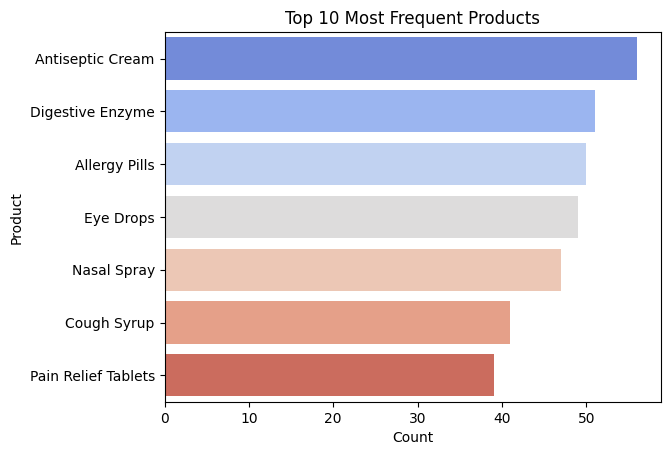

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

top_items = data['Product'].value_counts().head(10)

sns.barplot(x=top_items.values, y=top_items.index, palette='coolwarm')
plt.title('Top 10 Most Frequent Products')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()



## Step 2: Frequent Itemset Mining Using Apriori
- Use Apriori algorithm to find frequent itemsets with a minimum support threshold.


In [11]:
frequent_itemsets_apriori = apriori(basket, min_support=0.02, use_colnames=True)
frequent_itemsets_apriori.sort_values(by='support', ascending=False, inplace=True)
frequent_itemsets_apriori.head(10)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
1,0.279330,(Antiseptic Cream)
5,0.256983,(Nasal Spray)
3,0.256983,(Digestive Enzyme)
4,0.240223,(Eye Drops)
0,0.234637,(Allergy Pills)
6,0.206704,(Pain Relief Tablets)
2,0.201117,(Cough Syrup)
7,0.067039,"(Antiseptic Cream, Allergy Pills)"
15,0.067039,"(Eye Drops, Antiseptic Cream)"
22,0.067039,"(Nasal Spray, Digestive Enzyme)"


## Visualize Top Apriori Itemsets
- Plot the top 10 frequent itemsets discovered by Apriori.


/var/folders/3j/rf90718s4t3c_y1hyrrz5p4r0000gn/T/ipykernel_6582/3521366457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_apriori['support'], y=top_apriori['itemsets'].astype(str), palette='viridis')


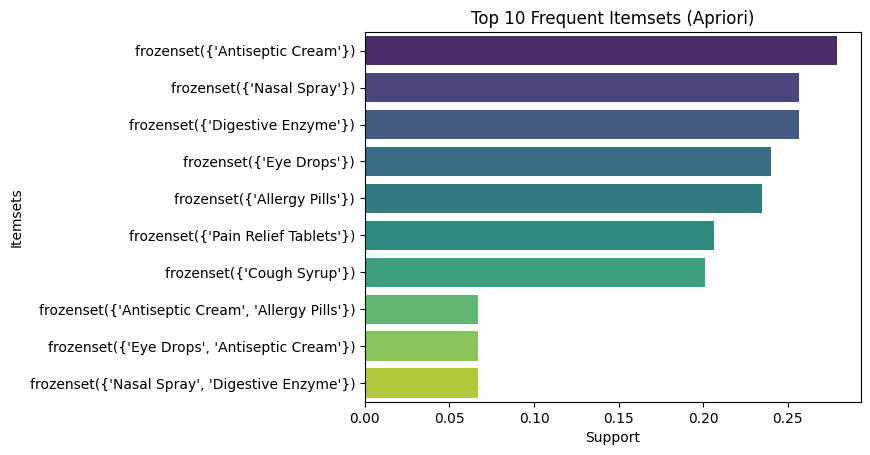

In [12]:
top_apriori = frequent_itemsets_apriori.head(10)
sns.barplot(x=top_apriori['support'], y=top_apriori['itemsets'].astype(str), palette='viridis')
plt.title('Top 10 Frequent Itemsets (Apriori)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()


## Step 3: Frequent Itemset Mining Using FP-Growth
- Use FP-Growth algorithm with the same support threshold.
- Compare efficiency with Apriori.


In [13]:
frequent_itemsets_fpgrowth = fpgrowth(basket, min_support=0.02, use_colnames=True)
frequent_itemsets_fpgrowth.sort_values(by='support', ascending=False, inplace=True)
frequent_itemsets_fpgrowth.head(10)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
3,0.279330,(Antiseptic Cream)
6,0.256983,(Nasal Spray)
0,0.256983,(Digestive Enzyme)
2,0.240223,(Eye Drops)
4,0.234637,(Allergy Pills)
1,0.206704,(Pain Relief Tablets)
5,0.201117,(Cough Syrup)
16,0.067039,"(Antiseptic Cream, Allergy Pills)"
26,0.067039,"(Nasal Spray, Digestive Enzyme)"
13,0.067039,"(Eye Drops, Antiseptic Cream)"


## Step 4: Generate Association Rules
- Generate association rules from the frequent itemsets.
- Use confidence and lift metrics to filter strong rules.


In [14]:
rules = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.5)
rules.sort_values(by='confidence', ascending=False, inplace=True)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


## Visualize Association Rules
- Scatter plot of confidence vs lift to identify strong rules.


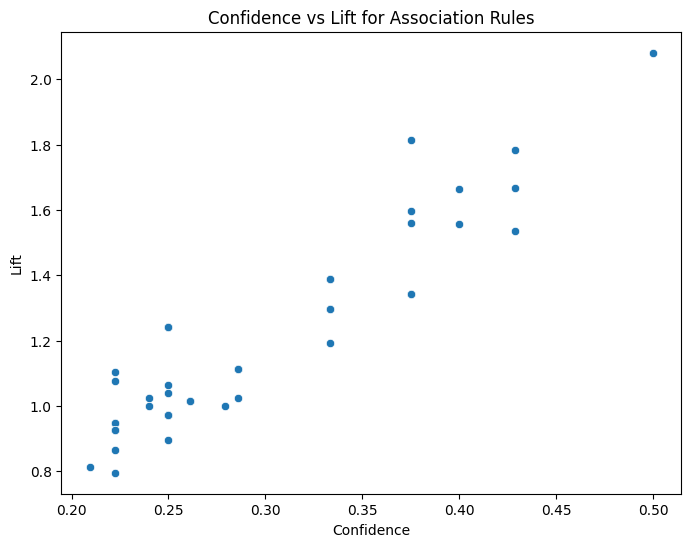

In [10]:
if not rules.empty:
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='confidence', y='lift', data=rules)
    plt.title('Confidence vs Lift for Association Rules')
    plt.xlabel('Confidence')
    plt.ylabel('Lift')
    plt.show()
else:
    print("No rules found. Try reducing thresholds.")


## Step 5: Comparative Analysis and Conclusion
- FP-Growth is usually faster than Apriori, especially on large datasets, due to its tree structure.
- Apriori generates candidate itemsets, which can be computationally expensive.
- Data cleaning and parameter tuning are critical for meaningful results.
- Association rules help identify useful item combinations for marketing strategies.

---

This lab enhanced understanding of association rule mining techniques and their practical application in retail data analysis.
